In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
# Leitura dos dados

dados_treino = pd.read_csv(r'dados/train.csv')

dados_teste = pd.read_csv(r'dados/test.csv')

## Exploração dos Dados 

In [3]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Já é possível notar que existem dados faltantes.

In [4]:
dados_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# melhor maneira para separar dados númericos e dados categóricos, para serem analisados separadamente
dados_treino.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
dados_num = dados_treino[['Age','SibSp','Parch','Fare']]
dados_cat = dados_treino[['Survived', 'Pclass', 'Sex', 'Embarked', 'Cabin', 'Ticket']]

## Exploração dos dados númericos

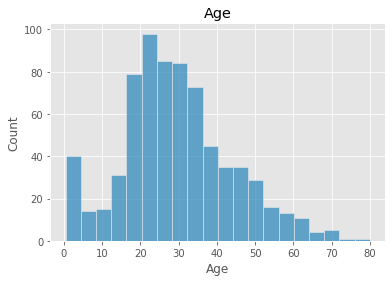

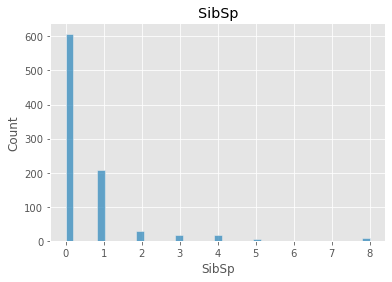

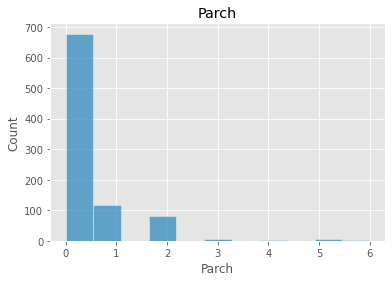

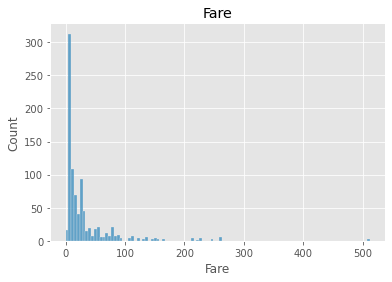

In [7]:
# Primeiro analisando os histogramas
plt.style.use('ggplot')
for i in dados_num.columns:
    sns.histplot(dados_num, x=i)
    plt.title(i)
    plt.show()

Algumas informações podem ser extraídas observando os histogramas, como que a maioria das pessoas não estava acompanhada (Parch e SibSp) e a idade média dos presentes no navio era entre aproximadamente 20-30 anos. Para fins de análise, pode ser interessante ver algumas variáveis que parecem serem importantes para prever a sobrevivência, como idade (visto que provável que os mais jovens tenham sido salvos) e Fare.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

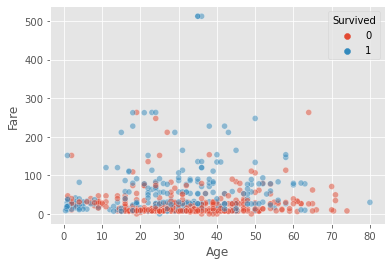

In [8]:
sns.scatterplot(data=dados_treino, x='Age', y='Fare', hue='Survived', alpha=0.5)

Este gráfico consegue mostrar duas coisas. Há uma concentração de sobreviventes com idades abaixo de 10 anos. O que mostra que realmente a idade é um fator interessante para a previsão da sobrevivência. Além disso, podemos ver que, nas idades mais avançadas, o número de sobreviventes também está bastante relacionado com o preço que o passageiro pagou naquela passagem, o que pode mostrar uma preferência em salvar aqueles passageiros que pagaram mais. De toda forma, essas variáveis também serão melhor entedidas ao serem apresentadas juntas com as variáveis sexo e classe.

## Exploração dos dados categóricos

Irei testar algumas hipóteses sobre os dados categóricos relacionados com a sobrevivência. Por exemplo, o sexo do passageiro interfere na taxa de sobrevivência? E sua classe, interefere? Retirei os dados de Cabine e Ticket porque não seriam úteis para a análise.

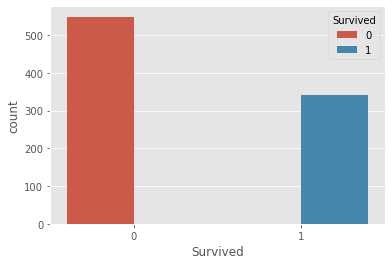

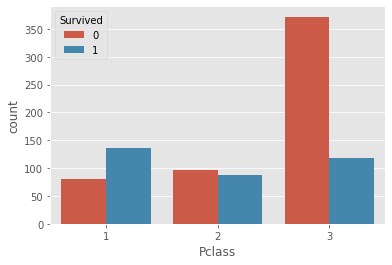

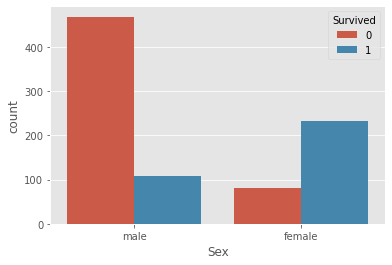

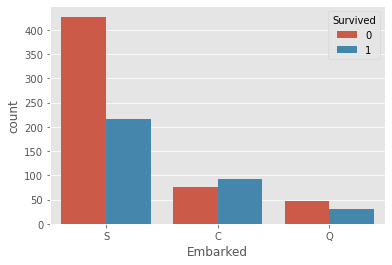

In [9]:
for i in dados_cat.columns:
    if i == 'Cabin' or i == 'Ticket':
        continue
    else:
        sns.countplot(data=dados_treino, x=i, hue='Survived')
        plt.show()

In [10]:
print('Agrupamento por sobrevivência e sexo')
print(dados_cat.groupby(['Survived', 'Sex'])['Sex'].count())
print()
print('Argrupamento por sobrevivência e Classe')
print(dados_cat.groupby(['Survived', 'Pclass'])['Pclass'].count())

Agrupamento por sobrevivência e sexo
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

Argrupamento por sobrevivência e Classe
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


Pode-se perceber algumas coisas interessantes com estes gráficos. Primeiro, o número de mortos supera o número de sobreviventes. Além disso, pode-se notar que as hipóteses iniciais eram verdadeiras: Mulheres sobreviveram em um número muito maior do que homens, visto pela preferência em salvar primeiro mulheres e crianças (como observamos o impacto da idade na sobrevivência); ademais, a classe do passageiro também interfere claramente, sendo os passageiros de primeira classe (e portanto, mais ricos) tendo o maior número de sobreviventes.

Por último, verifiquemos a matriz de correlação de todas as variáveis em conjunto, para termos uma idéia final de como as variáveis se correlacionam

<AxesSubplot:>

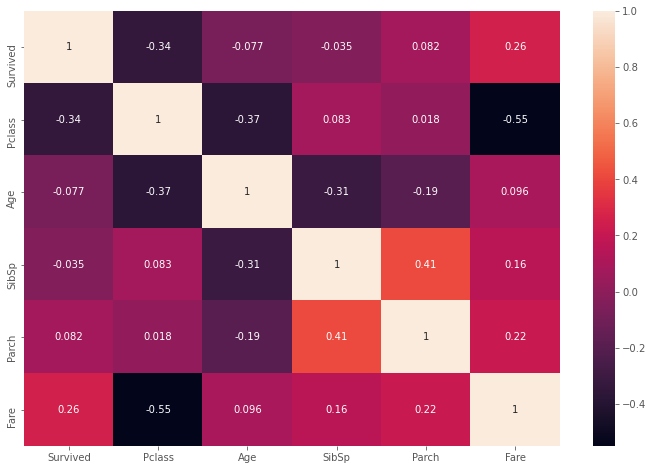

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(dados_treino.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1).corr(), annot=True)

Com a matriz de correlação, nossas hipóteses podem ser melhor ainda sustentadas. Podemos ver que realmente a classe tem uma correlação com a sobrevivência. Além disso, a idade também tem uma alta correlação negativa com a sobrevivência, o que significa, grosso modo, que quando a sobrevivência "aumenta" (isto é, passa de 0 para 1), a idade diminui, o que significa que pessoas com menor idade tem maior probabilidade de serem salvas.

## Feature Engineering

Pode-se ser interessante, a criação de novos features baseados com dados que já existem. Uma hipótese interessante, é sobre a avaliação dos dados faltantes para a coluna 'Cabin'. Esta coluna, possuí muitos dados faltantes, então verifiquemos se a ausência ou não destes dados faltantes interfere na sobreviência.

In [12]:
dados_treino[dados_treino['Cabin'].isna()]['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

C:\Users\art19\anaconda3\envs\TitanicProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

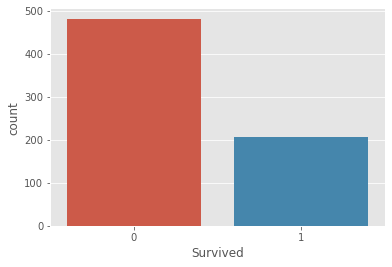

In [13]:
sns.countplot(dados_treino[dados_treino['Cabin'].isna()]['Survived'])

Como podemos ver, a maioria dos dados faltantes para a coluna Cabin são para passageiros que não sobreviveram. Uma hipótese para explicar isso seria a de que os dados foram perdidos com os passageiros que morreram. Portanto, seria interessante a criação de um feature que retrata se a cabine está nula ou não.

In [14]:
dados_treino['Cabine_nula'] = [1 if i==True else 0 for i in dados_treino['Cabin'].isna()]
dados_teste['Cabine_nula'] = [1 if i==True else 0 for i in dados_teste['Cabin'].isna()]

In [15]:
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabine_nula
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Além disso, um outro possível feature para ser criado é se o passageiro possuí algum título no nome, como Mrs., Mr. Col. etc. Isso pode indicar que o passageiro seja de uma classe mais alta.

In [16]:
# utilizando expressão regular para extrair o título
dados_treino['Titulo'] = dados_treino['Name'].str.extract(pat=r'([A-Za-z]+\.)')
dados_teste['Titulo'] = dados_teste['Name'].str.extract(pat=r'([A-Za-z]+\.)')

In [17]:
dados_treino['Titulo'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Mme.           1
Sir.           1
Jonkheer.      1
Lady.          1
Ms.            1
Countess.      1
Don.           1
Capt.          1
Name: Titulo, dtype: int64

Pode-se observar que possuem alguns diferentes tipos de títulos. Pode ser que haja uma relação entre a sobrevivência da pessoa e o seu título. Por exemplo, uma Condessa pode ter mais chance de sobreviver do que uma Miss. Para observar essa relação, podemos realizar uma plotagem.

<AxesSubplot:xlabel='Titulo', ylabel='count'>

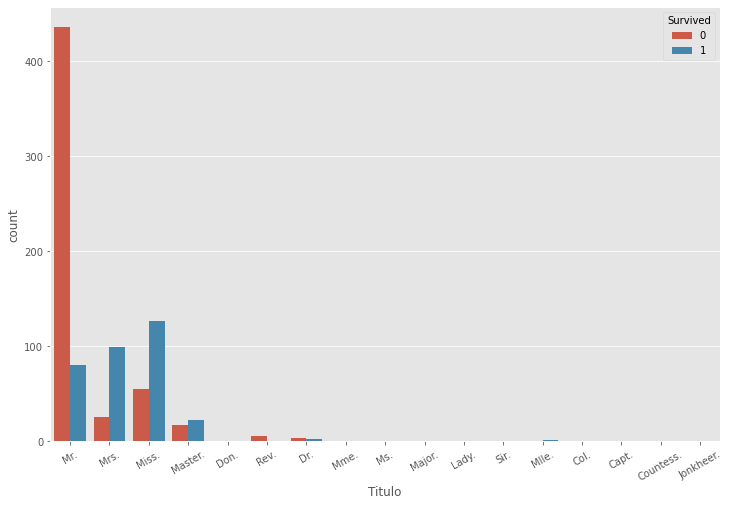

In [19]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=30) 
sns.countplot(data=dados_treino, x='Titulo', hue='Survived')

In [20]:
dados_treino.groupby(['Survived', 'Titulo'])['Titulo'].count()

Survived  Titulo   
0         Capt.          1
          Col.           1
          Don.           1
          Dr.            4
          Jonkheer.      1
          Major.         1
          Master.       17
          Miss.         55
          Mr.          436
          Mrs.          26
          Rev.           6
1         Col.           1
          Countess.      1
          Dr.            3
          Lady.          1
          Major.         1
          Master.       23
          Miss.        127
          Mlle.          2
          Mme.           1
          Mr.           81
          Mrs.          99
          Ms.            1
          Sir.           1
Name: Titulo, dtype: int64

Uma coisa interessante a se notar no plot é que a taxa de sobrevivência para os títulos Master é maior, o que pode significar uma preferência por salvar pessoas com esse título.

Por fim, por última análise, irei analisar se há alguma correlação entre o número da cabine e alguma variável do modelo, para verificar se essa informação pode ser relevante para a previsão.

In [21]:
# Coletando a primeira letra da cabine
dados_treino['letra_cabine'] = dados_treino[dados_treino['Cabine_nula']==0]['Cabin'].str[0]
dados_teste['letra_cabine'] = dados_teste[dados_teste['Cabine_nula']==0]['Cabin'].str[0]

<AxesSubplot:xlabel='letra_cabine', ylabel='count'>

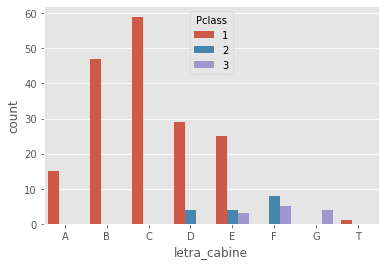

In [22]:
# Plotando a contagem da letra da cabine com hue sendo a classe
sns.countplot(data=dados_treino, x='letra_cabine', hue='Pclass', order=dados_treino.sort_values('letra_cabine')['letra_cabine'].dropna().unique())

Portanto, pode-se perceber que de fato, a inicial das cabines pode ter alguma importância na determinação da sobrevivência, visto que, ela parece determinar, mesmo que grosseiramente, qual classe tal passageiro pertence.

## Pré-processamento de Dados
É necessário realizar o tratamento de dados faltantes e também de escalonar e tratar as variáveis categóricas. Iniciarei tratando os dados faltantes. Para os dados faltantes da idade, uma boa estratégia é substituir esses dados pela mediana do título que a pessoa possuí, sendo melhor do que utilizar a mediana do grupo inteiro.
Irei juntar tanto a base de teste quanto a base de treinamento, para assim poder fazer um pré-processamento mais rico e com mais informações sobre as variáveis. Adicionarei uma coluna de "Treino" para que possa saber qual é a base de treino e qual a base de teste na hora de separar para treinar e prever com os modelos.

In [23]:
dados_treino['Treino']=1
dados_teste['Treino']=0

In [24]:
dados_treino_teste = pd.concat([dados_treino, dados_teste], axis=0)

In [25]:
dados_treino_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1046 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1308 non-null   float64
 10  Cabin         295 non-null    object 
 11  Embarked      1307 non-null   object 
 12  Cabine_nula   1309 non-null   int64  
 13  Titulo        1309 non-null   object 
 14  letra_cabine  295 non-null    object 
 15  Treino        1309 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 173.9+ KB


In [29]:
medianas = dados_treino_teste.groupby('Titulo')['Age'].describe()['50%']

In [30]:
for i in dados_treino_teste[dados_treino_teste['Age'].isna()].index:
    titulo = dados_treino_teste.iloc[i,13]
    dados_treino_teste.iloc[i, 5] = medianas[titulo]


Para o tratamento das colunas embarked e fare, utilizarei métodos mais simples de tratamento, por se tratar de poucos dados faltantes

In [31]:
dados_treino_teste['Fare'].fillna(value=dados_treino_teste['Fare'].mean(), inplace=True)

In [32]:
# utilizo S para prencher os NA na coluna Embarked pois foi a mais frequente
dados_treino_teste['Embarked'].fillna(value='S', inplace=True)

Resta apenas preencher os dados da letra inicial da cabine. Irei preenchê-los com 'Nula' caso a cabine seja nula.

In [33]:
dados_treino_teste['letra_cabine'].fillna(value='Nula', inplace=True)

In [35]:
# Por terem restado alguns dados faltantes na coluna Age, irei preenchê-los 
dados_treino_teste['Age'].fillna(dados_treino_teste['Age'].mean(), inplace=True)

Por fim, irei pegar as variáveis dummies das variáveis categóricas. Depois disso, exportarei um arquivo de treino e um de teste já tratados e pronto para o treinamento do modelo.

In [37]:
 dados_treino_teste = pd.get_dummies(dados_treino_teste, columns=['Sex', 'Embarked', 'Titulo', 'letra_cabine'], drop_first=True)

In [39]:
dados_treino_teste.to_csv('basecompleta.csv')